In [1]:
import numpy as np
from numpy import cos, sin, pi
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]
matplotlib.rcParams['lines.linewidth'] = 2

tmax = 1
N = 2**15
t = np.linspace(0, tmax, N)
dt = t[1] - t[0]

wnx = 20 # Hz
wny = 10 # Hz
A = 11.
B = 7.
x = A*sin(wnx*2*pi*t)
y = B*sin(wny*2*pi*t)

freqs = np.fft.rfftfreq(N, dt)
xf = np.fft.rfft(x, n=N)/(N//2)
yf = np.fft.rfft(y, n=N)/(N//2)

Text(0, 0.5, 'y(t)')

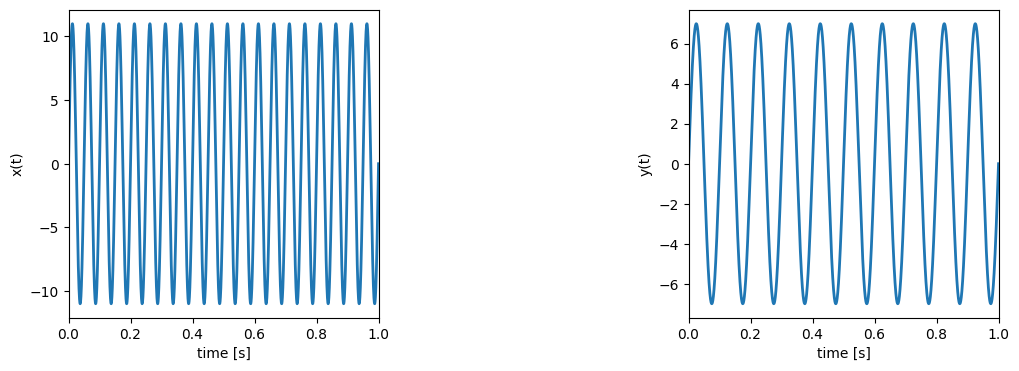

In [2]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_xlim(0, 1)
axes[1].set_xlim(0, 1)
axes[0].plot(t, x)
axes[0].set_xlabel('time [s]')
axes[0].set_ylabel('x(t)')
plt.subplots_adjust(wspace=1) 
axes[1].plot(t, y)
axes[1].set_xlabel('time [s]')
axes[1].set_ylabel('y(t)')

x amplitude 11.0
y amplitude 7.0


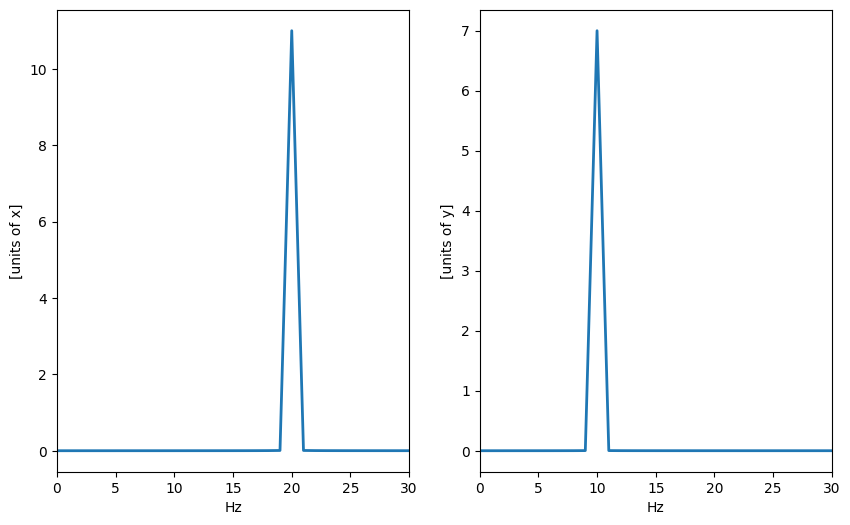

In [3]:
fig, axes = plt.subplots(ncols=2)
axes[0].set_xlim(0, 30)
axes[1].set_xlim(0, 30)
axes[0].plot(freqs, np.abs(xf))
axes[0].set_xlabel('Hz')
axes[0].set_ylabel('[units of x]')
axes[1].plot(freqs, np.abs(yf))
axes[1].set_xlabel('Hz')
axes[1].set_ylabel('[units of y]')
print('x amplitude', A)
print('y amplitude', B)

Power spectral density Pxx
---

recovered ampl 10.99982540939776


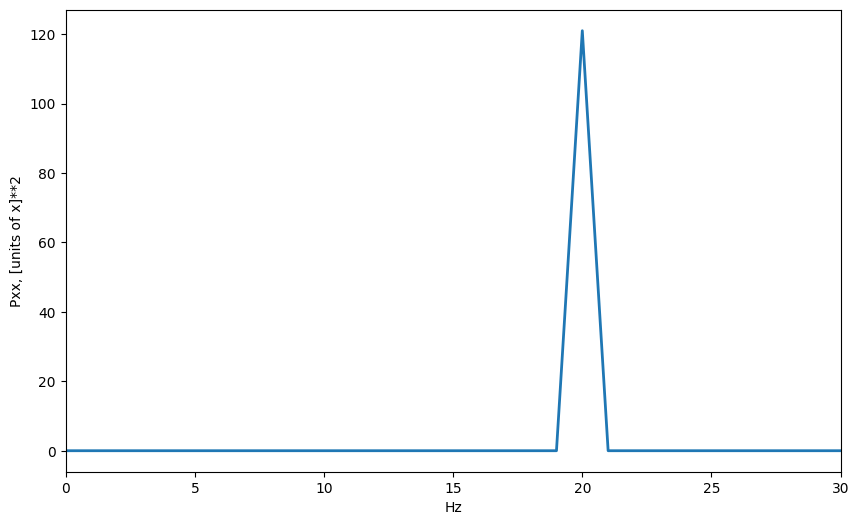

In [4]:
pxx = np.conj(xf)*xf 
plt.plot(freqs, np.abs(pxx))
plt.ylabel('Pxx, [units of x]**2')
plt.xlabel('Hz')
plt.xlim(0, 30)

print('recovered ampl', np.abs(pxx).max()**0.5)


Power spectral density Pyy
---

recovered ampl 6.999892114357265


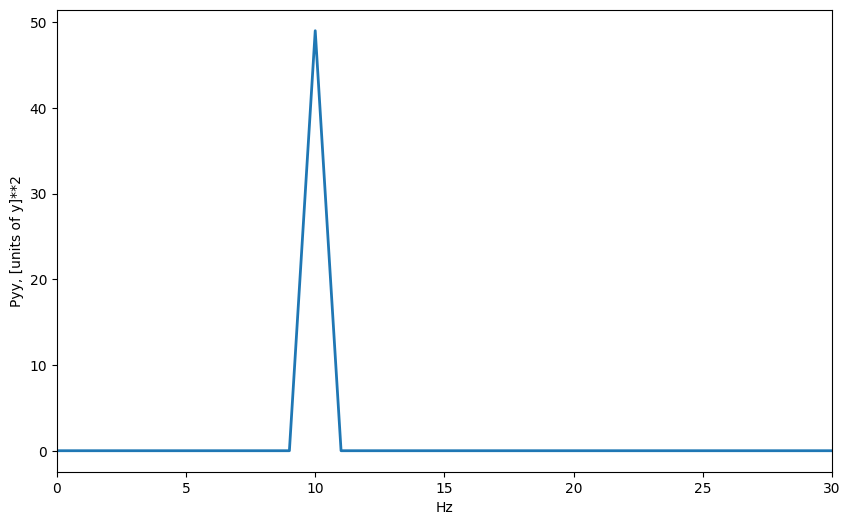

In [5]:
yf = np.fft.rfft(y, n=N)/(N//2)
pyy = np.conj(yf)*yf
plt.plot(freqs, np.abs(pyy))
plt.ylabel('Pyy, [units of y]**2')
plt.xlabel('Hz')
plt.xlim(0, 30)
print('recovered ampl', np.abs(pyy).max()**0.5)


Cross spectral density
---

True

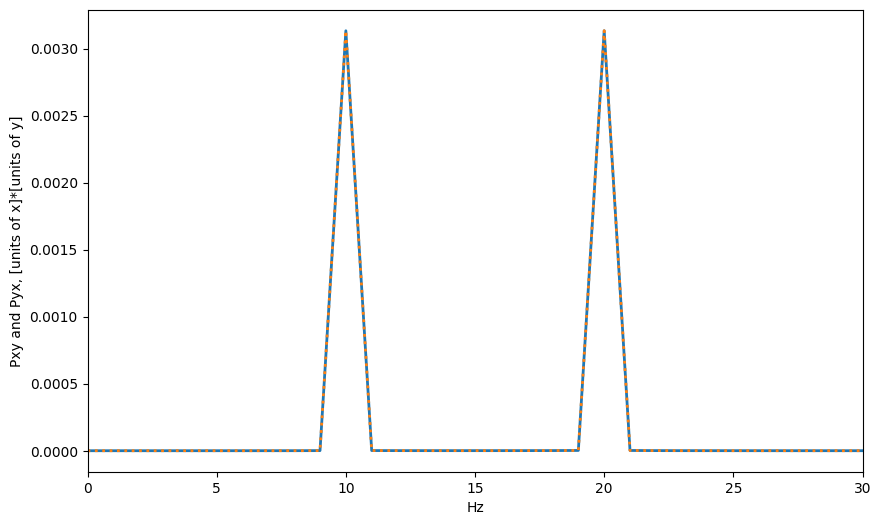

In [6]:
pxy = np.conj(xf)*yf
pyx = np.conj(yf)*xf
plt.plot(freqs, np.abs(pxy))
plt.plot(freqs, np.abs(pxy), ':')
plt.ylabel('Pxy and Pyx, [units of x]*[units of y]')
plt.xlabel('Hz')
plt.xlim(0, 30)
np.allclose(pxy, pyx)

Frequency Response Function (FRF)
---

(0.0, 30.0)

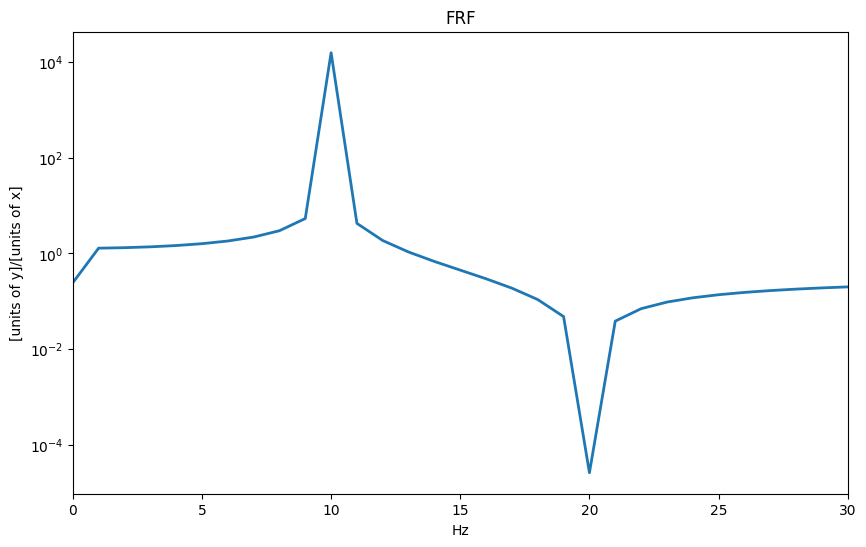

In [7]:
H = pxy/pxx
plt.semilogy(freqs, np.abs(H))
plt.ylabel('[units of y]/[units of x]')
plt.xlabel('Hz')
plt.title('FRF')
plt.xlim(0, 30)

Obtaining output signal in frequency domain
---

Text(0.5, 1.0, 'yf')

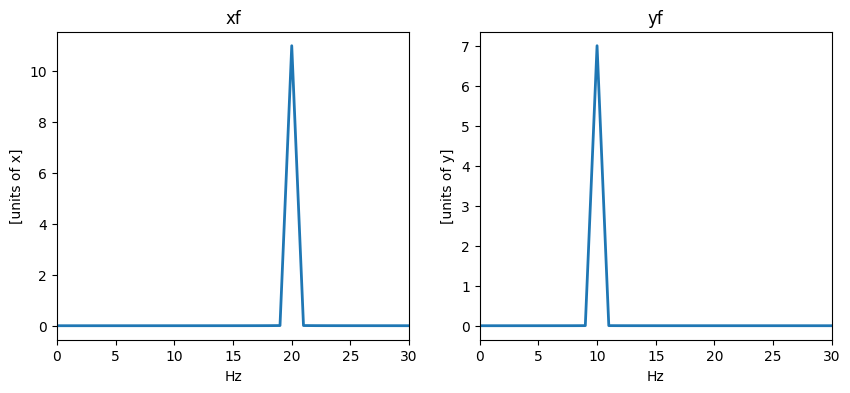

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
axes[0].set_xlim(0, 30)
axes[1].set_xlim(0, 30)
axes[0].plot(freqs, np.abs(xf))
axes[0].set_xlabel('Hz')
axes[0].set_ylabel('[units of x]')
axes[0].set_title('xf')
axes[1].plot(freqs, np.abs(yf))
axes[1].set_xlabel('Hz')
axes[1].set_ylabel('[units of y]')
axes[1].set_title('yf')

estimated amplitude 6.999892114357264


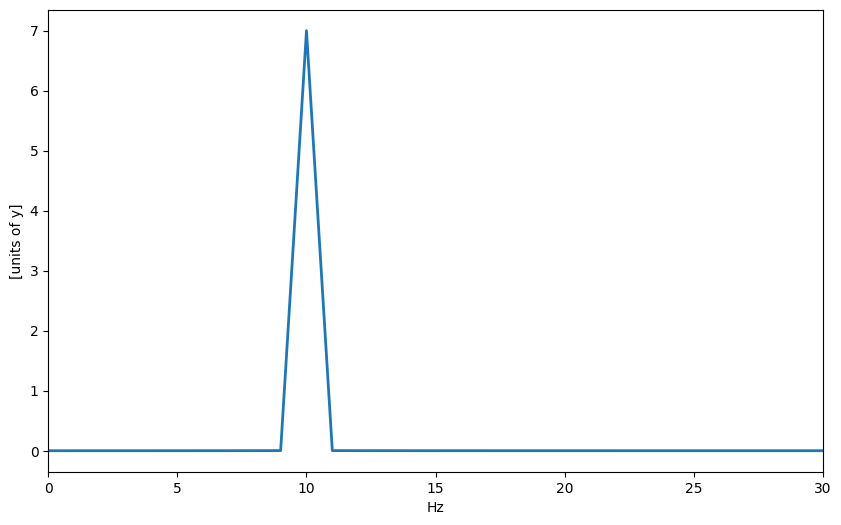

In [9]:
yf_est = H*xf

plt.plot(freqs, np.abs(yf_est))
plt.xlim(0, 30)
plt.xlabel('Hz')
plt.ylabel('[units of y]')
print('estimated amplitude', np.abs(yf_est).max())

original and estimated amplitude
6.999999991956697 6.999999991956695

original and estimated RMS
4.9496719405770655 4.9496719405770655


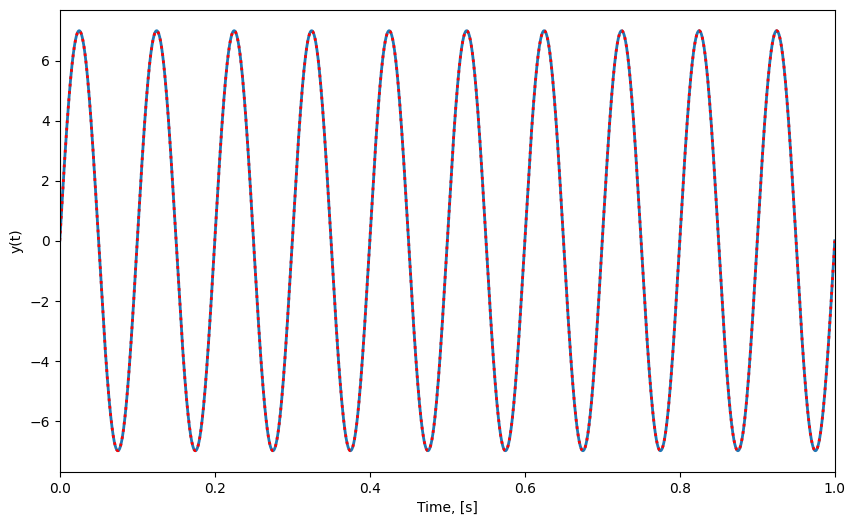

In [10]:
y_est = np.fft.irfft(yf_est*(N//2))
plt.plot(t, y_est)
plt.plot(t, y, ':r')
plt.xlabel('Time, [s]')
plt.ylabel('y(t)')
plt.xlim(0, 1)
print('original and estimated amplitude')
print(y.max(), y_est.max())
print()
print('original and estimated RMS')
print((y**2).mean()**0.5, (y_est**2).mean()**0.5)